[출처](https://www.datamanim.com/dataset/ADPpb/00/26.html)  

# 머신러닝
## 1. 데이터 확인 및 전처리

### 1.1 결측치를 확인하고, 결측치 제거할 것

### 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

### 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

**데이터 설명**

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

- UnitPrice: Unit price. Numeric, Product price per unit in sterling.

- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [3]:
df.shape

(35801, 8)

### 1.1 결측치를 확인하고, 결측치 제거할 것

In [4]:
df.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
23,C571473,21232,STRAWBERRY CERAMIC TRINKET BOX,-3.0,10/17/2011 14:38,NaN,12679.0,France
334,556509,22989,SET 2 PANTRY DESIGN TEA TOWELS,NaN,6/13/2011 10:33,3.25,12708.0,Germany
1099,550821,84987,SET OF 36 TEATIME PAPER DOILIES,1.0,4/21/2011 8:54,NaN,12506.0,France
1213,558113,21914,BLUE HARMONICA IN BOX,12.0,6/27/2011 8:48,NaN,14911.0,EIRE
1270,570657,22966,GINGERBREAD MAN COOKIE CUTTER,12.0,10/11/2011 14:10,NaN,14911.0,EIRE
...,...,...,...,...,...,...,...,...
34370,580736,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,12/6/2011 8:55,NaN,12716.0,France
34595,549953,21556,CERAMIC STRAWBERRY MONEY BOX,6.0,4/13/2011 13:15,NaN,12766.0,Portugal
34734,566739,22628,PICNIC BOXES SET OF 3 RETROSPOT,NaN,9/14/2011 14:30,4.95,12566.0,Germany
34829,537463,21731,RED TOADSTOOL LED NIGHT LIGHT,72.0,12/7/2010 10:08,NaN,12681.0,France


In [6]:
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만 추출
KNN_data = df[['Quantity', 'UnitPrice']]

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns] = df_filled

# 결측치 확인
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

[해석]
- Quantity, UnitPrice 두 컬럼에 결측치가 존재하였으며 모두 float형태로 확인함.
- 각 컬럼의 결측값이 전체 행 개수에 비해 적은 편이므로 KNN 알고리즘을 통해 결측치가 있는 변수를 대체함.

### 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

In [7]:
box_col = ['Quantity', 'UnitPrice']
melt_df = pd.melt(df[box_col], var_name='variance', value_name='value')
melt_df

,variance,value
0,Quantity,6.00
1,Quantity,12.00
2,Quantity,12.00
3,Quantity,24.00
4,Quantity,10.00
...,...,...
71597,UnitPrice,1.25
71598,UnitPrice,3.25
71599,UnitPrice,2.89
71600,UnitPrice,1.95


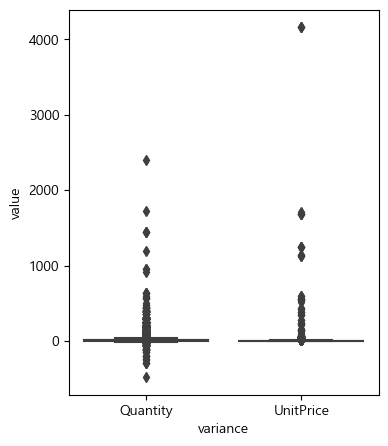

In [8]:
plt.figure(figsize=(4,5))
sns.boxplot(data=melt_df, x='variance', y='value');

In [9]:
# IQR을 이용한 이상치 탐색 함수
def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3-Q1
    IQR_weight = IQR*weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3+IQR_weight)].index
    
    return outlier_idx

In [10]:
# IQR로 이상치를 찾아 인덱스 저장되어 있음
out_index = detect_outliers(df=df, column='Quantity')
display(df.loc[out_index].sort_values(by='Quantity'))
out_index = detect_outliers(df=df, column='UnitPrice')
display(df.loc[out_index].sort_values(by='UnitPrice', ascending=False))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
618,C564899,M,Manual,-480.0,8/31/2011 11:31,0.22,14646.0,Netherlands
33863,C571499,72802C,VANILLA SCENT CANDLE JEWELLED BOX,-288.0,10/17/2011 15:07,1.25,12454.0,Spain
14848,C562375,22950,36 DOILIES VINTAGE CHRISTMAS,-288.0,8/4/2011 14:46,1.25,14911.0,EIRE
2256,C579090,84598,BOYS ALPHABET IRON ON PATCHES,-288.0,11/28/2011 10:48,0.21,12427.0,Germany
473,C579192,22959,WRAP CHRISTMAS VILLAGE,-250.0,11/28/2011 15:43,0.42,12657.0,France
...,...,...,...,...,...,...,...,...
9405,541570,21212,PACK OF 72 RETROSPOT CAKE CASES,1440.0,1/19/2011 12:34,0.42,14646.0,Netherlands
13341,581175,23084,RABBIT NIGHT LIGHT,1440.0,12/7/2011 15:16,1.79,14646.0,Netherlands
5699,536890,17084R,ASSORTED INCENSE PACK,1440.0,12/3/2010 11:48,0.16,14156.0,EIRE
8219,572052,22595,GINGHAM HEART DECORATION,1728.0,10/20/2011 12:26,0.72,14646.0,Netherlands


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28503,573077,M,Manual,1.0,10/27/2011 14:13,4161.06,12536.0,France
12353,573080,M,Manual,1.0,10/27/2011 14:20,4161.06,12536.0,France
24047,C573079,M,Manual,-2.0,10/27/2011 14:15,4161.06,12536.0,France
14601,C542348,M,Manual,-1.0,1/27/2011 12:09,1715.85,12539.0,Spain
30542,546329,M,Manual,1.0,3/11/2011 10:22,1687.17,14911.0,EIRE
...,...,...,...,...,...,...,...,...
5495,562374,22192,BLUE DINER WALL CLOCK,12.0,8/4/2011 14:40,7.65,14911.0,EIRE
34709,563076,22626,BLACK KITCHEN SCALES,12.0,8/11/2011 16:12,7.65,14646.0,Netherlands
23295,558262,22193,RED DINER WALL CLOCK,12.0,6/28/2011 8:45,7.65,14646.0,Netherlands
11117,562374,22193,RED DINER WALL CLOCK,12.0,8/4/2011 14:40,7.65,14911.0,EIRE


In [11]:
# Quantity의 이상치를 평균값으로 대체
df.loc[df['Quantity'] < 0, 'Quantity'] = np.mean(df['Quantity'])
df.sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20834,544996,22487,WHITE WOOD GARDEN PLANT LADDER,1.0,2/25/2011 11:53,9.95,12474.0,Germany
25262,562560,21738,COSY SLIPPER SHOES SMALL RED,1.0,8/5/2011 17:12,2.95,14156.0,EIRE
30572,556509,21843,RED RETROSPOT CAKE STAND,1.0,6/13/2011 10:33,10.95,12708.0,Germany
33075,564975,21034,REX CASH+CARRY JUMBO SHOPPER,1.0,8/31/2011 15:35,0.95,17097.0,Spain
2509,568048,22762,CUPBOARD 3 DRAWER MA CAMPAGNE,1.0,9/23/2011 12:36,14.95,14911.0,EIRE
...,...,...,...,...,...,...,...,...
5699,536890,17084R,ASSORTED INCENSE PACK,1440.0,12/3/2010 11:48,0.16,14156.0,EIRE
9405,541570,21212,PACK OF 72 RETROSPOT CAKE CASES,1440.0,1/19/2011 12:34,0.42,14646.0,Netherlands
13341,581175,23084,RABBIT NIGHT LIGHT,1440.0,12/7/2011 15:16,1.79,14646.0,Netherlands
8219,572052,22595,GINGHAM HEART DECORATION,1728.0,10/20/2011 12:26,0.72,14646.0,Netherlands


[해석]
- 이상치를 제거하는 방법 중 boxplot은 시각적으로 바로 발견할 수 있고, 4분위수를 활용하는 IQR을 활용하여 통계적으로 이상치를 처리할 수 있음.
- CustomerID 컬럼을 제외한 수치형 변수 2개의 이상치를 확인하기 위해 상자그림을 그렸고, 해당 이상치를 제거하기 위해 IQR로 이상치를 찾음.
- Quantity는 수량을 나타내기에 음수값은 나올 수 없어서 분석가의 판단으로 음수값만 평균으로 대체함.
- UnitPrice 컬럼에서 이상치로 나타난 값들이 실제로도 이상치 인지 아닌지는 혼자 판단하기보다 협업에서 논의를 통해 결정해야할 사항으로 판단하여 처리하지 않음.

### 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

In [12]:
# K-Means 군집분석을 위해 연속형 변수만 추출
df3 = df[['Quantity', 'UnitPrice']]
df3.head()

,Quantity,UnitPrice
0,6.0,1.95
1,12.0,1.25
2,12.0,1.25
3,24.0,1.25
4,10.0,1.25


In [14]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df3)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(df3, labels))

23782.64626927941
29293.66271868545
36025.05491753872
49149.97033672068
61426.51100853867
71622.39175197505
78201.23083223744
88533.1714272067


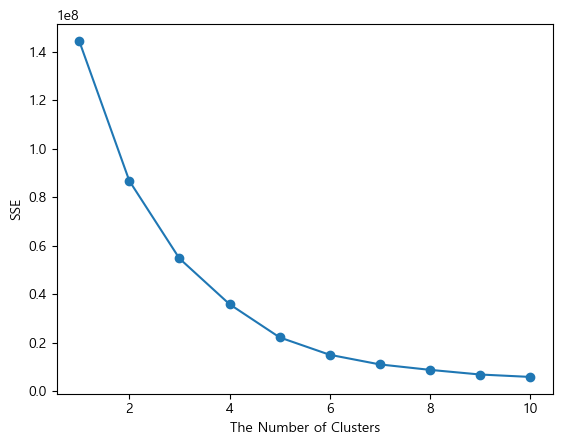

In [15]:
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(df3)

[해석]
- 콜린스키 하라바츠 스코어 결과 k값이 9일 때 가장 높은 값을 갖는 것을 확인했음.
- 하지만 이를 가지고 k를 확정짓기 어려우므로 엘보우기 기법을 사용하여 적절한 k를 추가로 확인함.
- 5에서 6으로 갈때, 기울기 소실이 발생하므로 해당 데이터에서는 5~6개의 군집이 적절함을 알 수 있음.

In [16]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters=9, random_state=1)
km.fit(df3)

# 할당된 군집을 df 데이터에 추가
new_labels = km.labels_
df['cluster'] = new_labels
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany,0
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE,0
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium,0
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands,6
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France,0
...,...,...,...,...,...,...,...,...,...
35796,554137,21668,RED STRIPE CERAMIC DRAWER KNOB,12.0,5/23/2011 10:13,1.25,12708.0,Germany,0
35797,572986,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,6.0,10/27/2011 10:51,3.25,12681.0,France,0
35798,579927,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6.0,12/1/2011 9:20,2.89,12572.0,Germany,0
35799,551163,22431,WATERING CAN BLUE ELEPHANT,1.0,4/26/2011 15:52,1.95,12573.0,France,0


## 2. 군집분석

### 2.1 위에서 생성한 군집들의 특성을 분석하시오.

In [17]:
df.cluster.value_counts()

0    26761
6     6987
5     1579
2      378
7       51
8       23
1       13
4        6
3        3
Name: cluster, dtype: int64

[해석]
- 총 9개의 군집으로 나누었고, 군집별 개수를 확인한 결과, 0이 가장 많은 데이터 수를 차지했음.

In [18]:
group_mean = df.groupby('cluster').mean()
group_mean.reset_index(inplace=True)
group_mean.drop(columns=['CustomerID'])

,cluster,Quantity,UnitPrice
0,0,7.744636,4.203434
1,1,11.722791,1380.940769
2,2,228.936508,1.190053
3,3,6.808179,4161.060000
4,4,1608.000000,0.931667
5,5,102.763141,1.335549
6,6,28.377917,1.446404
7,7,463.137255,1.256078
8,8,9.333474,419.234522


[해석]
- 그룹 3: Quantity 값이 가장 낮은 반면, UnitPrice 값은 타 그룹에 비해 가장 높음.
- 그룹 4: Quantity 값이 타 그룹에 비해 가장 높은 반면, UnitPrice 값은 가장 낮음.

### 2.2 각 군집 별 대표 추천 상품을 도출할 것

In [58]:
# 군집별로 등장한 빈도수가 가장 높은 Description 파악
result = df.groupby('cluster')['Description'].apply(lambda x: x.value_counts().idxmax())
result

cluster
0                            POSTAGE
1                             Manual
2               DOLLY GIRL LUNCH BOX
3                             Manual
4    PACK OF 72 RETROSPOT CAKE CASES
5             SPACEBOY BIRTHDAY CARD
6    PACK OF 72 RETROSPOT CAKE CASES
7               DOLLY GIRL LUNCH BOX
8                             Manual
Name: Description, dtype: object

In [66]:
df.loc[df['cluster']==1, ['cluster', 'Description']].value_counts('Description')

Description
Manual    13
dtype: int64

[해석]
- 각 군집별로 추천상품을 도출할 수 있음.
    - 그룹 0: POSTAGE
    - 그룹 1: Manual
    - 그룹 2: DOLLY GIRL LUNCH BOX
    - 그룹 3: Manual
    - 그룹 4: PACK OF 72 RETROSPOT CAKE CASES
    - 그룹 5: SPACEBOY BIRTHDAY CARD
    - 그룹 6: PACK OF 72 RETROSPOT CAKE CASES
    - 그룹 7: DOLLY GIRL LUNCH BOX

### 2.3 CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [70]:
df[df['CustomerID']==12413]['cluster'].value_counts()

0    39
6     1
Name: cluster, dtype: int64

[해석]
- CustomerID가 12413인 고객의 cluster는 0과 6으로 나옴.
- 따라서 1순위로 추천할 수 있는 상품은 POSTAGE, 2순위는 PACK OF 72 RETROSPOT CAKE CASES으로 할 수 있는 것임.

---
# 통계분석
## 3. 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [74]:
def calculate_sample_size(p, z, d):
    n = p*(1-p)*(z**2)/(d**2)
    print('최소 샘플 사이즈는 {}보다 커야 함.'.format(n))
calculate_sample_size(0.9, 1.96, 0.05)

최소 샘플 사이즈는 138.29759999999993보다 커야 함.


[해석]
- 표본 크기의 최솟값은 139이다.

## 4. 아래 그래프는 1월부터 9월까지의 은의 가격이다

### 4.1 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

### 4.2 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [75]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem4.csv')
df.head()

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


## 5. 아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라

### 5.1 연구가설과 귀무가설을 설정하라
[가설]
- 귀무가설: 자치구별 W의원에 대한 지지율에 차이가 없다.
- 대립가설: 자치구별 W의원에 대한 지지율에 차이가 있다.

### 5.2 검정통계량 구하고 결론을 내라

In [78]:
table = pd.DataFrame({
    'A':[176,124], 'B':[193, 107], 'C':[159, 141]}, index = ['찬성', '반대'])
table

,A,B,C
찬성,176,193,159
반대,124,107,141


In [80]:
import scipy.stats as stats
chi, p, df, expect = stats.chi2_contingency(table)
print('통계량: ', chi)
print('p-value:', p)
print('자유도:', df)
print('expect:', expect)

통계량:  7.945381231671554
p-value: 0.01882272023214683
자유도: 2
expect: [[176. 176. 176.]
 [124. 124. 124.]]


[해석]
- 독립성 검정 결과, p-value < 0.05이므로 귀무가설을 기각하여 자치구별 지지율에 차이가 있다고 할 수 있음.

## 6. A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

### 6.1 연구가설과 귀무가설을 설정하라
[가설]
- 귀무가설: 성별 간 평균 혈압에 차이가 없다.
- 대립가설: 성별 간 평균 혈압에 차이가 있다.

### 6.2 통계량을 구하고, 연구가설 채택여부를 기술하라.
[해석]
- p-value > 0.05이므로 귀무가설을 기각하지 못하므로 성별 간 평균 혈압에 차이가 없다고 할 수 있음.

### 6.3 6.2 에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem6.csv')
display(df.head())

male = df.loc[df['gender']=='male', 'pressure']
female = df.loc[df['gender']=='female', 'pressure']
print(stats.ttest_ind(male, female))

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


Ttest_indResult(statistic=1.3813481801194591, pvalue=0.18044550626193734)


In [101]:
# 신뢰구간 계산
confidence_level = 0.95
alpha = 1 - confidence_level
n1, n2 = len(male), len(female)
degrees_of_freedom = n1 + n2 - 2
t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
mean_difference = np.mean(male) - np.mean(female)
standard_error = np.sqrt((np.var(male) / n1) + (np.var(female) / n2))
margin_of_error = t_critical * standard_error
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

# 결과 출력
print("Confidence Interval:", confidence_interval)

Confidence Interval: (-2.42562922683015, 13.018684782385716)


## 7. height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라 A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다. 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

### 7.1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

### 7.2 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라